# Train, Validation and Test split ###

In this Python file, I have taken input of Raw Dataframe as Pickle file splits them for Time-series forecasting and returns three pickle files, namely Train, Validation and Test

columns in the output dataframes:#

 * Date     - Index column
 * Solar_generation_MWh	- Solar generation in Germany
 * Installed_capacity	 - Solar Installed capacity in Germany
 * Actual_consumption   - Total Consumption data of Germany
 * Price                - Market price ( Day_ahead Price)
 * Solar_generation_MWh_normalized - Normalisation of Solar generation in Germany

## Logic used

Initially, Test data (Last 1 year data) is seperated and stored in Test dataframe. The remaining Dataframe is then seperated



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
import os
import pickle

# If you want a style choose one
#plt.style.use('Solarize_Light2')
plt.style.use('tableau-colorblind10')
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'


#DATA_DIRECTORY = '../data/'
#folder_paths = '../data/'

In [27]:
df = pd.read_pickle('/Users/haribhaskar/Desktop/neuefische_course/EES_Optimisation/data/final_dataframe-2.pkl')

df.tail()

,Date,Photovoltaics [MWh] Original resolutions,Photovoltaics [MW] Calculated resolutions,Total (grid load) [MWh] Original resolutions,Germany/Luxembourg [€/MWh] Calculated resolutions,normalisation_factor,Solar_generation_MWh_normalized
163675,2023-06-01 22:45:00,0.0,62579.0,12945.50,95.41,1.0,0.0
163676,2023-06-01 23:00:00,0.0,62579.0,12817.75,86.53,1.0,0.0
163677,2023-06-01 23:15:00,0.0,62579.0,12539.00,86.53,1.0,0.0
163678,2023-06-01 23:30:00,0.0,62579.0,12371.00,86.53,1.0,0.0
163679,2023-06-01 23:45:00,0.0,62579.0,12176.75,86.53,1.0,0.0


In [19]:
def pickle_load(path): 
    with open('%s' %path, 'rb') as f: 
        test = df.loc[df.index >= '2022-06-01']
        
        return pickle.load(f)
    

In [28]:
df_pkl = pickle_load('/Users/haribhaskar/Desktop/neuefische_course/EES_Optimisation/data/final_dataframe-2.pkl')
df_pkl = df_pkl.set_index('Date')
df_pkl = df_pkl.rename(columns={'Germany/Luxembourg [€/MWh] Calculated resolutions' : 'Price',
        'Total (grid load) [MWh] Original resolutions' : 'Actual_consumption',
        'Photovoltaics [MWh] Original resolutions': 'Solar_generation_MWh',
        'Photovoltaics [MW] Calculated resolutions' : 'Installed_capacity',
        'Solar_generation_MWh_normalized' : 'Solar_generation_MWh_normalized'})
df_pkl.drop(['normalisation_factor'],axis=1).tail()

,Solar_generation_MWh,Installed_capacity,Actual_consumption,Price,Solar_generation_MWh_normalized
Date,,,,,
2023-06-01 22:45:00,0.0,62579.0,12945.50,95.41,0.0
2023-06-01 23:00:00,0.0,62579.0,12817.75,86.53,0.0
2023-06-01 23:15:00,0.0,62579.0,12539.00,86.53,0.0
2023-06-01 23:30:00,0.0,62579.0,12371.00,86.53,0.0
2023-06-01 23:45:00,0.0,62579.0,12176.75,86.53,0.0


# Test data split

In [32]:

test = df_pkl.loc[df_pkl.index >= '2022-06-01'].copy()
df_rest = df_pkl.loc[df_pkl.index < '2022-06-01'].copy()


,Solar_generation_MWh,Installed_capacity,Actual_consumption,Price,normalisation_factor,Solar_generation_MWh_normalized
Date,,,,,,
2022-06-01 00:00:00,0.0,58002.0,11317.75,220.00,0.92686,0.0
2022-06-01 00:15:00,0.0,58002.0,11203.75,220.00,0.92686,0.0
2022-06-01 00:30:00,0.0,58002.0,11089.00,220.00,0.92686,0.0
2022-06-01 00:45:00,0.0,58002.0,10982.75,220.00,0.92686,0.0
2022-06-01 01:00:00,0.0,58002.0,10934.50,207.45,0.92686,0.0


In [35]:
tss = TimeSeriesSplit(n_splits=5, test_size=4*24*182,gap=4*24)
df_rest = df_rest.sort_index()

In [36]:
def train_val_test_split(df):

    fig,axs = plt.subplots(5,1,figsize=(15,15),
                            sharex=True)
    fold = 0
    for train_idx, val_idx in tss.split(df):
        train = df.iloc[train_idx]
        val= df.iloc[val_idx]
        train['Actual_consumption'].plot(ax=axs[fold], label = 'Training set', title=f'Data Train/Test split {fold}')
        val['Actual_consumption'].plot(ax=axs[fold], label ='Test set' )
        axs[fold].axvline(val.index.min(), color='black', ls='--')
        fold += 1
    return (train, val)

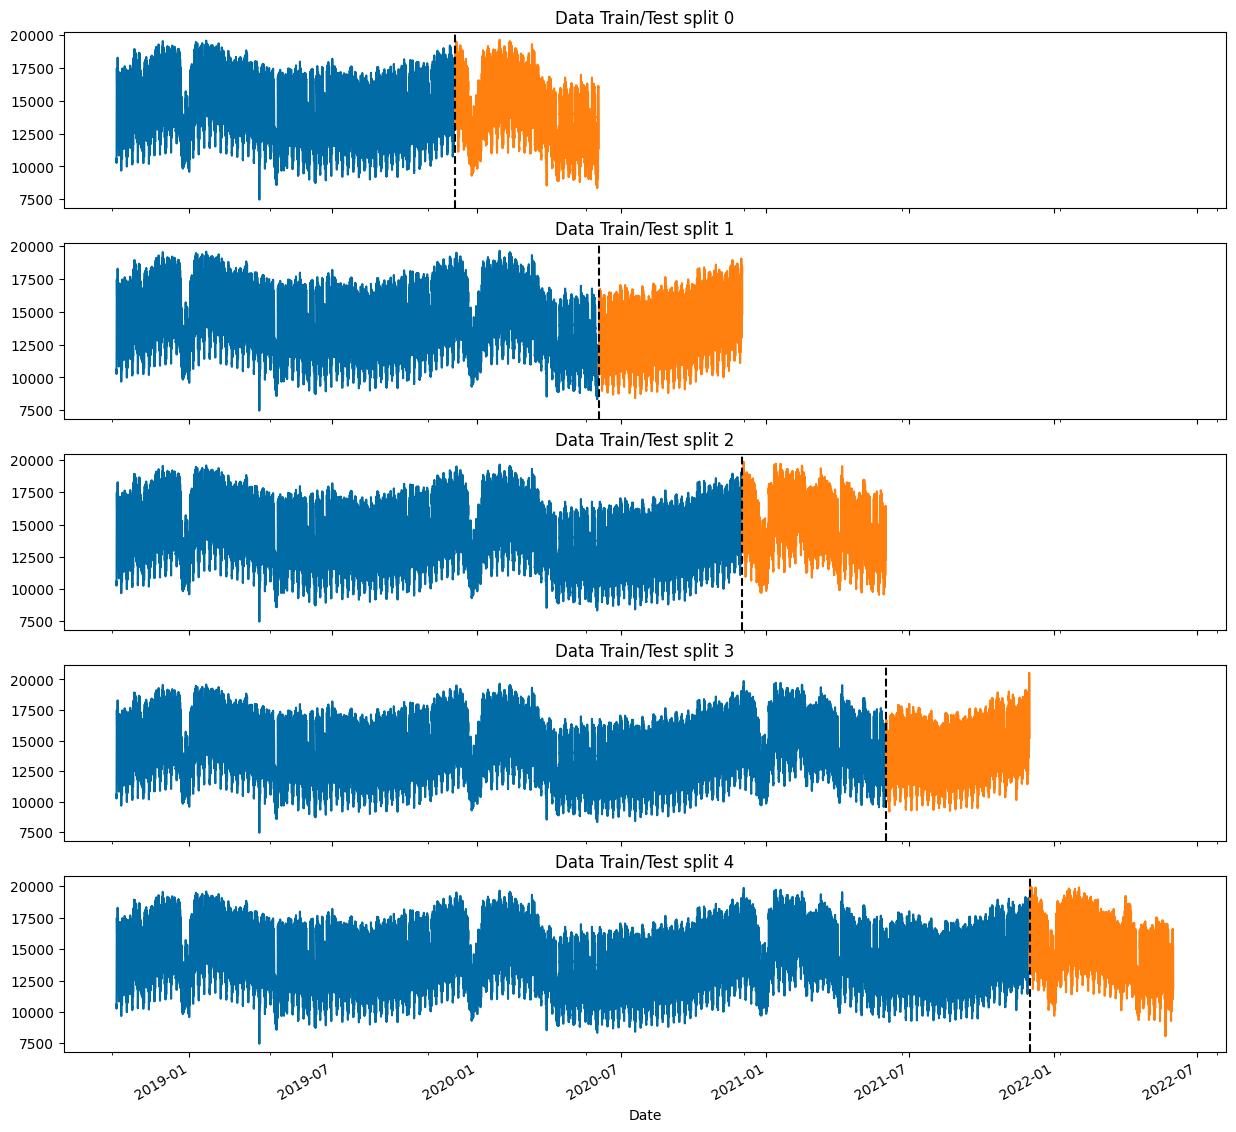

In [41]:
train,val = train_val_test_split(df_rest)

 we will save the final data frame as pickle to preserve the pandas metadata

In [42]:
train.tail()

,Solar_generation_MWh,Installed_capacity,Actual_consumption,Price,normalisation_factor,Solar_generation_MWh_normalized
Date,,,,,,
2021-11-29 21:45:00,0.0,53538.0,16482.75,234.68,0.855527,0.0
2021-11-29 22:00:00,0.0,53538.0,16375.75,193.53,0.855527,0.0
2021-11-29 22:15:00,0.0,53538.0,16183.00,193.53,0.855527,0.0
2021-11-29 22:30:00,0.0,53538.0,15994.75,193.53,0.855527,0.0
2021-11-29 22:45:00,0.0,53538.0,15748.00,193.53,0.855527,0.0


In [43]:
train.to_pickle("../data/train.pkl")
val.to_pickle("../data/val.pkl")
test.to_pickle("../data/test.pkl")
